In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [234]:
df = pd.read_csv("imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [235]:
# in this line of code we extract the numeric part like 142 min  and convert into float
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)
# we also remove the commas and  dollar signs and convert into float
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '').astype(float)
# we 
df['Genre_Main'] = df['Genre'].str.split(',').str[0]
# this removes rows where any of these three columns (IMDB_Rating, Runtime, Gross) are missing (NaN).
df.dropna(subset=['IMDB_Rating', 'Runtime', 'Gross'], inplace=True)

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_15944\2944621372.py:2: SyntaxWarning:

invalid escape sequence '\d'



In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    object 
 3   Certificate    785 non-null    object 
 4   Runtime        831 non-null    float64
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     750 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    float64
 16  Genre_Main     831 non-null    object 
dtypes: float64(4), int64(1), object(12)
memory usage: 116.9+ KB

In [237]:
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,831.000000,831.000000,750.000000,8.310000e+02,8.310000e+02
mean,124.078219,7.946931,77.460000,3.152499e+05,6.803475e+07
std,27.501455,0.283204,12.493967,3.436443e+05,1.097500e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,104.000000,7.700000,70.000000,7.143000e+04,3.253559e+06
50%,120.000000,7.900000,78.000000,1.867340e+05,2.353089e+07
75%,138.000000,8.100000,86.000000,4.457210e+05,8.075089e+07
max,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [238]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_Main
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime


In [239]:
df.shape

(831, 17)

In [240]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross',
       'Genre_Main'],
      dtype='object')

In [241]:
df.duplicated().sum()

0

No duplicates Values are present.


In [242]:
df["Released_Year"].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', 'PG', '1953'], dtype=object)

Check if any Null Values are present or not.

In [243]:
df.isnull().sum()

Poster_Link       0
Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score       81
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
Genre_Main        0
dtype: int64

Here we removed all the Null Values using dropna method

In [244]:
df.dropna(inplace=True)

In [258]:
df[['IMDB_Rating', "Runtime", "Gross"]].describe()

,IMDB_Rating,Runtime,Gross
count,714.000000,714.000000,7.140000e+02
mean,7.937115,123.715686,7.851359e+07
std,0.293278,25.887535,1.149780e+08
min,7.600000,72.000000,1.305000e+03
25%,7.700000,104.250000,6.157408e+06
50%,7.900000,120.000000,3.485015e+07
75%,8.100000,136.000000,1.024641e+08
max,9.300000,238.000000,9.366622e+08


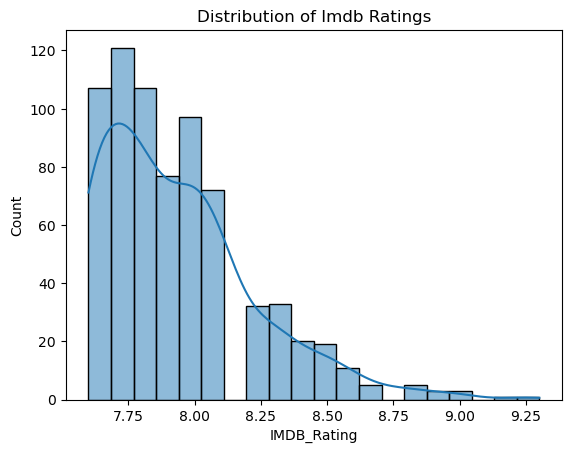

In [245]:
sns.histplot(df["IMDB_Rating"], bins = 20, kde = True)
plt.title("Distribution of Imdb Ratings")
plt.show()

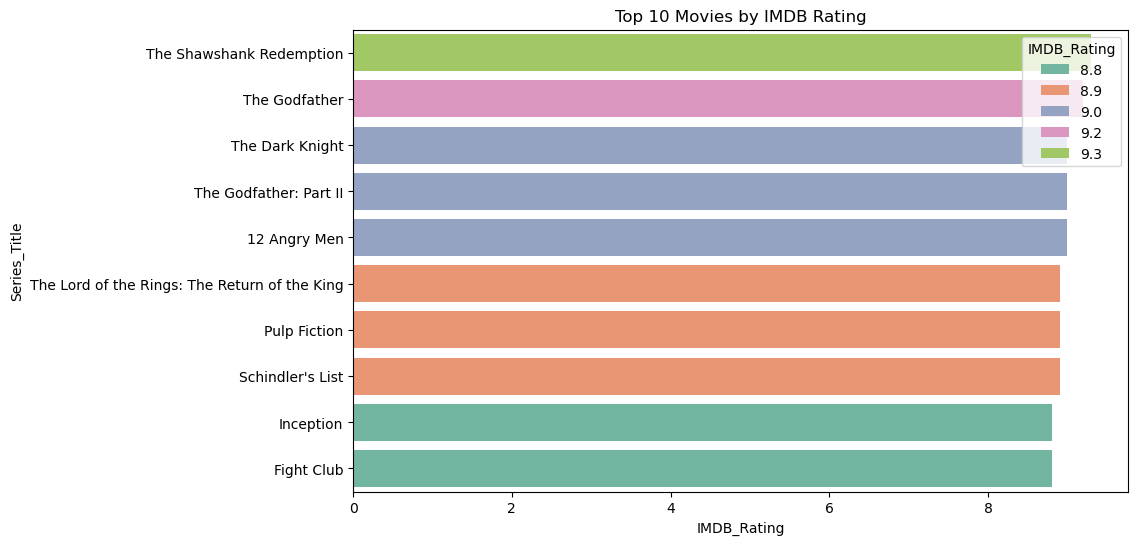

In [246]:
top_movies = df.nlargest(10, "IMDB_Rating")
plt.figure(figsize=(10,6))
sns.barplot(x = "IMDB_Rating", y = "Series_Title", data = top_movies, hue="IMDB_Rating", palette="Set2" )
plt.title("Top 10 Movies by IMDB Rating")
plt.show()

In [247]:
fig = px.bar(df , x = "Gross", y = "Genre_Main", color = "Genre_Main",
             title = "Gross Revenue by Genre")
fig.show()

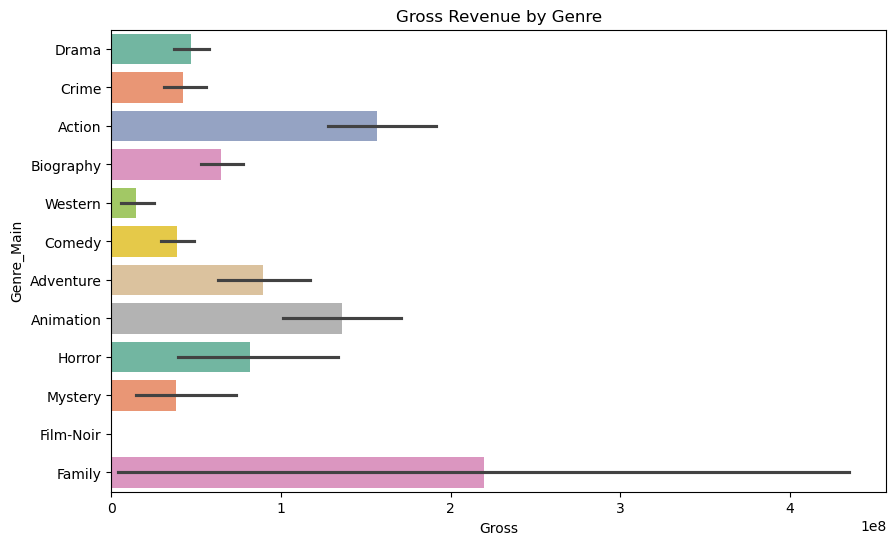

In [248]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Gross", y = "Genre_Main", data = df, hue="Genre_Main" ,palette="Set2")
plt.title("Gross Revenue by Genre")
plt.show()

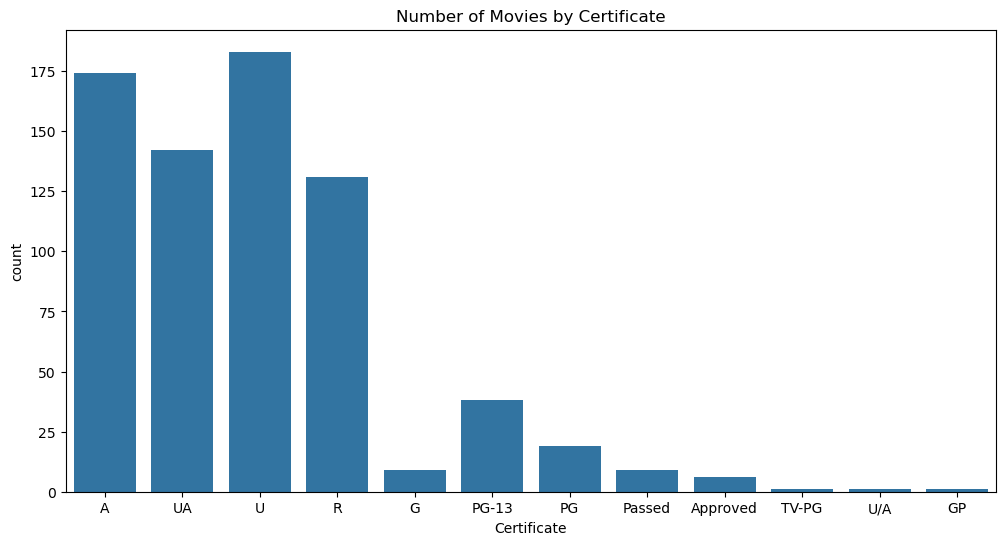

In [249]:
plt.figure(figsize=(12,6))
sns.countplot(x='Certificate', data=df)
plt.title('Number of Movies by Certificate')
plt.show()


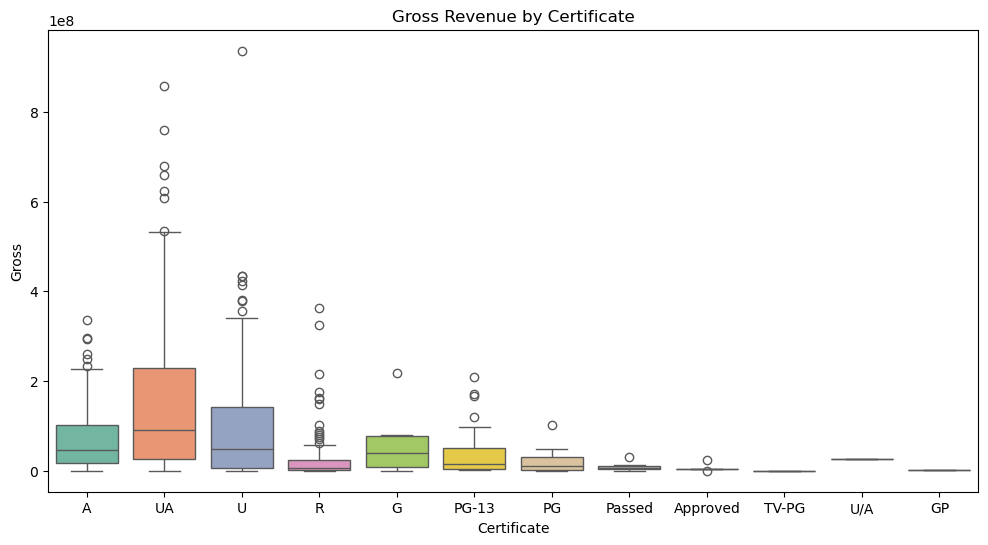

In [250]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "Certificate", y ="Gross", data = df, hue = "Certificate", palette="Set2")
plt.title("Gross Revenue by Certificate")
plt.show()

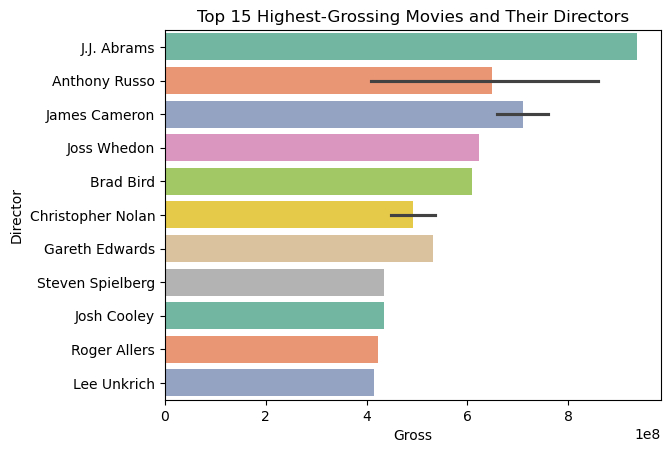

In [251]:
top_movies = df.nlargest(15, "Gross")
plt.Figure(figsize=(16,8))
sns.barplot(x = "Gross", y = "Director", data = top_movies , hue= "Director", palette="Set2" )
plt.title("Top 15 Highest-Grossing Movies and Their Directors")
plt.show()

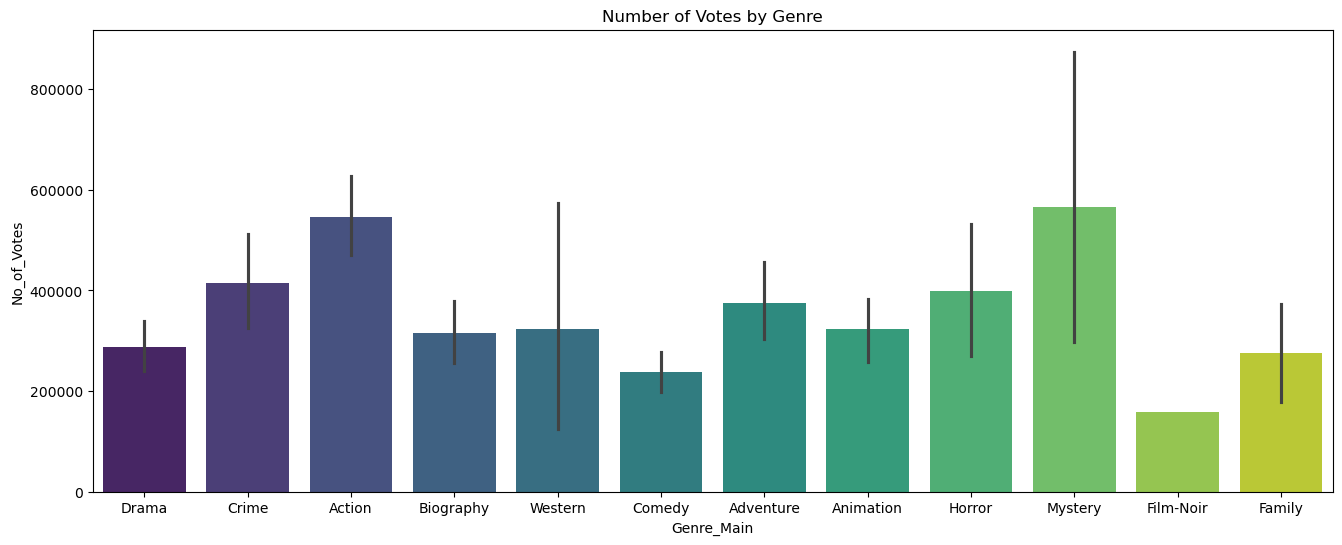

In [252]:
plt.figure(figsize=(16,6))
sns.barplot(x = "Genre_Main", y = "No_of_Votes", data = df, hue = "Genre_Main" ,palette="viridis")
plt.title("Number of Votes by Genre")
plt.show()

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_15944\2360109353.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1600x600 with 0 Axes>

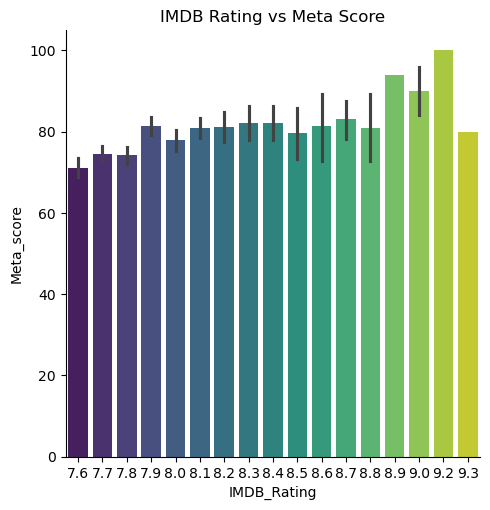

In [253]:
plt.figure(figsize=(16,6))
sns.catplot(x = "IMDB_Rating", y = "Meta_score", data = df, kind= "bar", palette="viridis")
plt.title("IMDB Rating vs Meta Score")
plt.show()

In [254]:
top_movies = df.nlargest(10, "Runtime")
fig = px.bar(top_movies, x = "Runtime", y = "Series_Title", color = "Runtime", title="Top 10 Movies by Runtime")
fig.show()

In [255]:
top_movies = df.nlargest(10, "No_of_Votes")
fig = px.bar(top_movies, x = "No_of_Votes", y = "Series_Title", color = "No_of_Votes",
             title= "Top 10 Movies by Number of Votes")
fig.show()

In [257]:
top_movies = df.nlargest(15, "Runtime")

fig = px.scatter(top_movies, x = "IMDB_Rating", y = "Runtime",color = "Runtime",
                title= "IMDB Rating vs Runtime")
fig.show()